In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

S=scipy.io.loadmat('wine.mat');

FileNotFoundError: [Errno 2] No such file or directory: 'wine.mat'

In [ ]:
header_list = ['Alcohol','Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 
               'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280/OD315_of_diluted_wines', 'Proline', 'Label']
df = pd.DataFrame(np.hstack((S['X'], S['y'])), columns=header_list)


In [ ]:
df.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline,Label
0,13.29,1.97,2.68,16.8,102.0,3.00,3.23,0.31,1.66,6.00,1.07,2.84,1270.0,1.0
1,14.30,1.92,2.72,20.0,120.0,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280.0,1.0
2,13.68,1.83,2.36,17.2,104.0,2.42,2.69,0.42,1.97,3.84,1.23,2.87,990.0,1.0
3,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,1.0
4,14.22,1.70,2.30,16.3,118.0,3.20,3.00,0.26,2.03,6.38,0.94,3.31,970.0,1.0


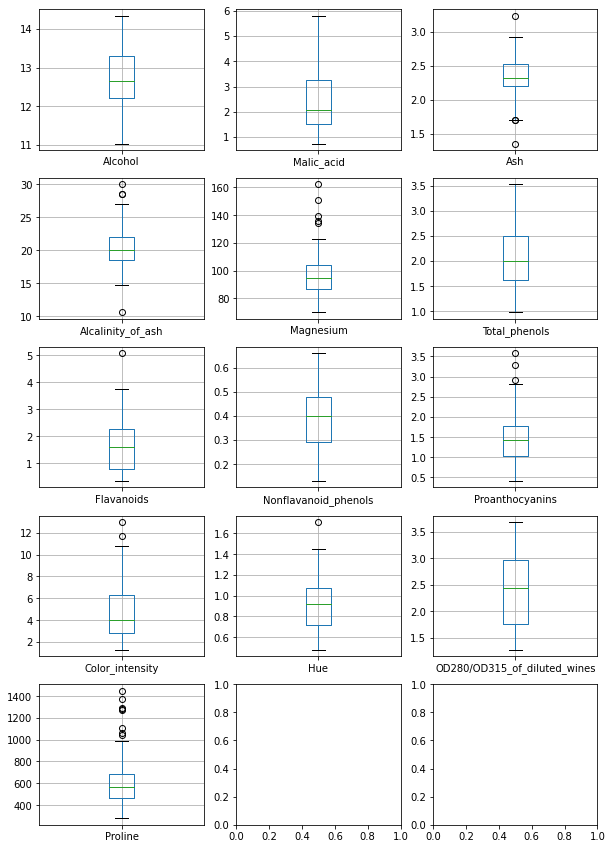

In [ ]:

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,15))

for i in range(13):
  df.boxplot(column=df.columns[i], ax=axes[i//3,i%3])
plt.show()

По графикам видно, что выбросы наиболее видны в переменных ```Proline```, ```Magnesium```, ```Proanthocyanins```, ```Ash```

In [ ]:
df.describe()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline,Label
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,12.726357,2.445659,2.336279,20.448837,97.449612,2.088605,1.662791,0.391395,1.467597,4.902015,0.918729,2.390775,612.093023,0.077519
std,0.743290,1.214085,0.281999,3.048978,14.812875,0.582708,0.907591,0.127725,0.572998,2.595929,0.247050,0.687786,225.483039,0.268456
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.210000,1.510000,2.200000,18.500000,87.000000,1.630000,0.800000,0.290000,1.040000,2.850000,0.720000,1.750000,465.000000,0.000000
50%,12.640000,2.060000,2.320000,20.000000,95.000000,2.000000,1.590000,0.400000,1.420000,4.000000,0.920000,2.440000,564.000000,0.000000
75%,13.290000,3.270000,2.530000,22.000000,104.000000,2.500000,2.260000,0.480000,1.770000,6.300000,1.070000,2.960000,685.000000,0.000000
max,14.340000,5.800000,3.230000,30.000000,162.000000,3.520000,5.080000,0.660000,3.580000,13.000000,1.710000,3.690000,1450.000000,1.000000


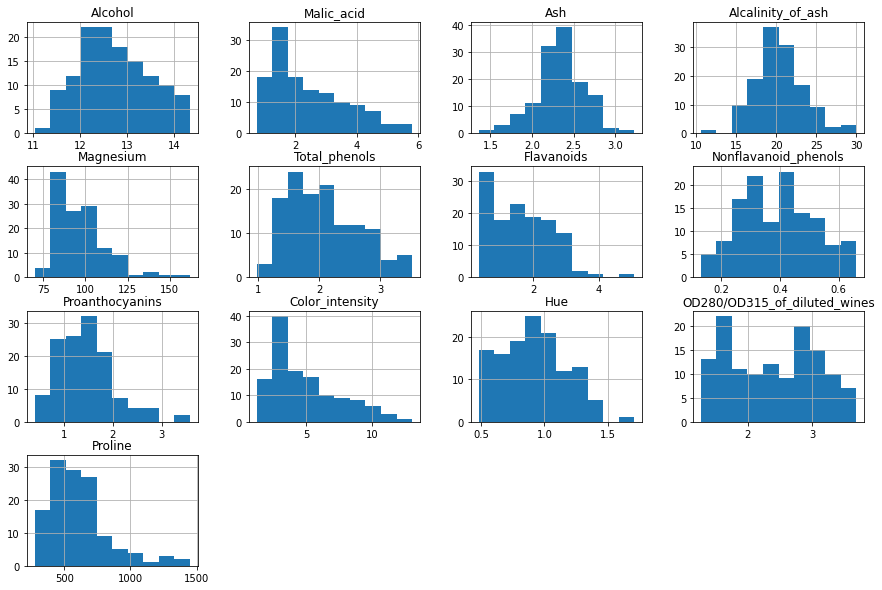

In [ ]:
df.hist(column=df.columns[:13],figsize=(15,100))
plt.show()

In [ ]:
x_raw = df.iloc[:,:13].values
y = df['Label'].values

In [ ]:
from scipy.cluster.vq import vq, kmeans, whiten

# Передача данных и количества кластеров в kmeans () 
codebook, distortion = kmeans(x_raw, 4)

In [ ]:
from scipy.cluster.vq import vq
groups, cdist = vq(x_raw, codebook)

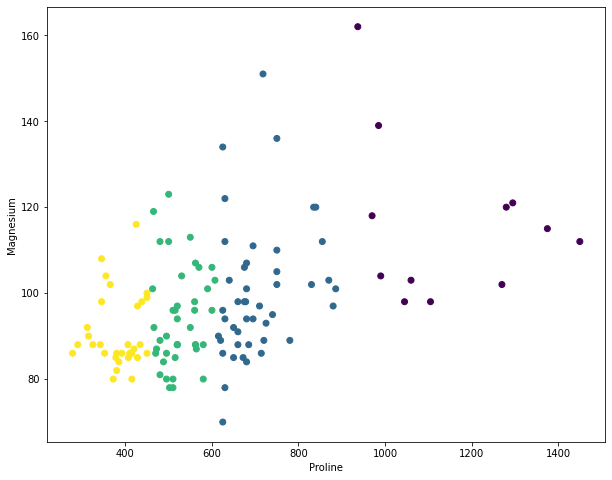

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Proline'], df['Magnesium'], c=groups)
plt.xlabel('Proline')
plt.ylabel('Magnesium')
plt.show()

In [ ]:
!pip install pyod

     |████████████████████████████████| 102kB 4.0MB/s 
     |████████████████████████████████| 2.1MB 34.2MB/s 
  Created wheel for pyod: filename=pyod-0.8.4-cp36-none-any.whl size=112082 sha256=01582cada8bfaf2a87f4243047ea1ceb304ac762f6f5405a4bfca9359f791796
  Stored in directory: /root/.cache/pip/wheels/ad/31/0a/c2d4ba2d066145c55f0cb2846e59b18d874cb59c5d9adc81cf
  Created wheel for combo: filename=combo-0.1.1-cp36-none-any.whl size=42113 sha256=4f296d71bb2a56ab340b82d54605160e56bbaa550928fbd4fdf95f2280c960c3
  Stored in directory: /root/.cache/pip/wheels/55/ec/e5/a2331372c676c467e70c6646e646edf6997d5c4905b8c0f5e6
  Created wheel for suod: filename=suod-0.0.4-cp36-none-any.whl size=2167157 sha256=f16ee1772f5017e7a2ee514bd51cc39405a57eaca2c6f06a0c832343d8cdf5c2
  Stored in directory: /root/.cache/pip/wheels/57/55/e5/a4fca65bba231f6d0115059b589148774b41faea25b3f2aa27
Successfully built pyod combo suod


contamination - количество аномалий в данных (в процентах), которое для нашего случая составляет 10/129=0.078

n_neighbors - количество соседей, которые нужно учитывать для измерения близости

In [ ]:
from pyod.models.knn import KNN
clf = KNN(contamination=0.078, n_neighbors=6)
clf.fit(x_raw)

KNN(algorithm='auto', contamination=0.078, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=6, p=2,
  radius=1.0)

In [ ]:
y_train_pred = clf.labels_ 
y_train_pred, y.astype('int64')

(array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [ ]:
# Выбросы
y_train_scores = clf.decision_scores_ 
y_train_scores

array([210.01538563, 220.65996805, 104.13876464, 235.69892172,
        91.28019884, 136.48173651, 125.68308916, 165.06599317,
       390.12179226, 315.2343763 ,  15.9148704 ,  16.17612747,
        21.65805162,  17.26366126,  13.78438247,  29.66004046,
        13.94745138,  17.00920045,  15.37899542,  36.89066955,
        58.40996148,  40.09224284,  20.24057064,  16.95133918,
       106.43503934,  56.15840632,  21.80777384,  16.40839115,
        25.73579608,  50.68055544,  19.55066239,  68.09102364,
        29.91978944,  20.87770581,  11.92411003,  11.12997754,
        20.46050342,  17.05155418,  19.67135989,  18.01432763,
        26.36368904,  16.03602195,  20.15124314,  15.22631604,
        55.93053549,  22.62574198,  89.32950865,  38.12423901,
        17.2129399 ,  19.50465073,  14.79912497,  27.67357946,
        18.53550377,  17.2129399 ,  13.57673378,  15.53247566,
        35.01440561,  15.16381878,  16.39653317,  34.53971482,
        12.21564571,  19.74034194,  28.34586037,  21.03

In [ ]:
from pyod.utils import evaluate_print

# Evaluate on the training data
evaluate_print('KNN', y, y_train_scores)

KNN ROC:0.9983, precision @ rank n:0.9


Мы видим, что KNN() модель показала исключительно хорошие результаты на обучающих данных.

Он предоставляет три показателя и их оценки -

ROC Точность Рейтинг уверенности, с которым он дает оценки выбросов.

**Изолирующее дерево**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')

gs = GridSearchCV(IsolationForest(random_state=42),
                      param_grid = {'n_estimators' : [150],
                                    'contamination' : [0.078],
                                    'max_samples' : range(3, 8),
                                    'bootstrap' : [True, False]},
                    cv = 7, scoring='accuracy').fit(x_raw, y)
  
pred_forest = gs.predict(x_raw)
pred_forest = (pred_forest == -1).astype(int)
pred_forest


array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
evaluate_print('Isolation Forest', y, pred_forest)

Isolation Forest ROC:0.679, precision @ rank n:0.4444


In [ ]:
x_raw_2 = df[['Proline', 'Magnesium', 'Proanthocyanins', 'Alcalinity_of_ash', 'Hue', 'Flavanoids']].values

In [ ]:
isol_forest2 = IsolationForest(n_estimators=150,
                        contamination=0.078,
                        bootstrap=True,
                        random_state=42,
                        max_samples=5).fit(x_raw_2, y)
pred_forest2 = isol_forest2.predict(x_raw_2)
pred_forest2 = (pred_forest2 == -1).astype(int)
pred_forest2, y

(array([0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.,

In [ ]:
evaluate_print('Isolation Forest2', y, pred_forest2)

Isolation Forest2 ROC:0.7332, precision @ rank n:0.5556
